In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
import matplotlib
import time

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import ExtraTreeClassifier

from sklearn.neural_network.multilayer_perceptron import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Activation, Flatten, Dense, Reshape
from keras.layers import Conv1D, MaxPooling1D

In [81]:
data = pd.read_csv('Extracted Datasets/Labeled_Data.csv')
data

,time,spco2,o2,chl,latitude,no3,po4,phyc,si,ph,...,sithick,bottomT,vsi,vo,uo,so,zos,year,month,status
0,1993-01,36.726260,202.00583,0.099680,5.0,0.003172,0.162117,1.022812,2.209642,8.055850,...,0.0,1.088503,0.0,-0.087893,-0.393689,33.840450,0.412915,1993,1,Normal
1,1993-02,36.783768,201.45949,0.131979,5.0,0.005559,0.140069,1.270865,2.249973,8.057028,...,0.0,1.051882,0.0,-0.043336,-0.561541,33.428448,0.404675,1993,2,Normal
2,1993-03,37.420750,201.05914,0.103792,5.0,0.005198,0.112618,1.290958,2.149168,8.050865,...,0.0,1.092165,0.0,-0.058596,-0.310068,33.280434,0.379345,1993,3,Normal
3,1993-04,37.691418,202.61496,0.122649,5.0,0.006888,0.040207,1.815386,2.345055,8.046124,...,0.0,1.104618,0.0,0.020753,-0.142827,33.274330,0.433668,1993,4,Normal
4,1993-05,37.404984,199.29587,0.147509,5.0,0.018156,0.079537,1.361681,2.147852,8.049934,...,0.0,1.155155,0.0,-0.096438,0.387585,33.584095,0.463271,1993,5,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37747,2018-08,36.985157,201.51051,0.095523,15.0,0.004001,0.005664,1.070496,3.350507,8.044085,...,0.0,2.064119,0.0,-0.076296,0.193487,32.494583,0.704672,2018,8,Normal
37748,2018-09,37.173195,203.91109,0.113762,15.0,0.395310,0.001402,1.204578,5.414463,8.040235,...,0.0,2.088289,0.0,-0.098270,0.009156,32.694480,0.597858,2018,9,Normal
37749,2018-10,37.328945,201.82707,0.084241,15.0,0.505156,0.000062,1.191821,4.177589,8.034385,...,0.0,2.004791,0.0,0.122074,0.017701,31.960508,0.606708,2018,10,Critical
37750,2018-11,36.868763,202.43008,0.084943,15.0,0.839644,0.000070,1.267263,5.375829,8.038933,...,0.0,1.994537,0.0,-0.031739,-0.288095,29.915770,0.658284,2018,11,Critical


In [96]:
train, test = train_test_split(data, test_size = 0.25)

In [97]:
"""'spco2',
'o2',
#'chl',
'no3',
'po4',
'si',
'ph',
'nppv',
'fe', 
'mlotst', 
'thetao', 
'so',"""
X_train = train[[
    'po4',
    'si',
    'nppv',
    'thetao',
]]
y_train = train.status
X_test = test[[
    'po4',
    'si',
    'nppv',
    'thetao',
]]
#'so','po4','ph','fe','no3' most effective
y_test = test.status

scaler = MinMaxScaler()
scaler.fit(pd.concat([X_train,X_test]))
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
SVMmodel = SVC(gamma='auto')
a = time.time()
SVMmodel = SVMmodel.fit(X_train, y_train)
b = time.time()
print('Train time for SVM: ' + str(b-a))


KNNmodel = KNeighborsClassifier(n_neighbors=1)
a = time.time()
KNNmodel = KNNmodel.fit(X_train, y_train)
b = time.time()
print('Train time for KNN: ' + str(b-a))


RNNmodel = RadiusNeighborsClassifier(radius=1.085)
a = time.time()
RNNmodel = RNNmodel.fit(X_train, y_train)
b = time.time()
print('Train time for RNN: ' + str(b-a))


DTCmodel = DecisionTreeClassifier()
a = time.time()
DTCmodel = DTCmodel.fit(X_train, y_train)
b = time.time()
print('Train time for DTC: ' + str(b-a))


RFCmodel = RandomForestClassifier(n_estimators=100)
a = time.time()
RFCmodel = RFCmodel.fit(X_train, y_train)
b = time.time()
print('Train time for RFC: ' + str(b-a))


ETCmodel = ExtraTreeClassifier()
a = time.time()
ETCmodel = ETCmodel.fit(X_train, y_train)
b = time.time()
print('Train time for ETC: ' + str(b-a))


GNBmodel = GaussianNB()
a = time.time()
GNBmodel = GNBmodel.fit(X_train,y_train)
b = time.time()
print('Train time for GNB: ' + str(b-a))


BNBmodel = BernoulliNB()
a = time.time()
BNBmodel = BNBmodel.fit(X_train,y_train)
b = time.time()
print('Train time for BNB: ' + str(b-a))


LRGmodel = LogisticRegression(solver='lbfgs')
a = time.time()
LRGmodel = LRGmodel.fit(X_train, y_train)
b = time.time()
print('Train time for LRG: ' + str(b-a))


LDAmodel = LinearDiscriminantAnalysis()
a = time.time()
LDAmodel = LDAmodel.fit(X_train, y_train)
b = time.time()
print('Train time for LDA: ' + str(b-a))


MLPmodel = MLPClassifier(solver='lbfgs')
a = time.time()
MLPmodel = MLPmodel.fit(X_train, y_train)
b = time.time()
print('Train time for MLP: ' + str(b-a))

Train time for SVM: 21.181148290634155
Train time for KNN: 0.07105159759521484
Train time for RNN: 0.08149337768554688
Train time for DTC: 0.20608186721801758
Train time for RFC: 5.927748680114746
Train time for ETC: 0.05492138862609863
Train time for GNB: 0.043203115463256836
Train time for BNB: 0.10568451881408691
Train time for LRG: 0.19332408905029297
Train time for LDA: 0.09421157836914062
Train time for MLP: 8.514078617095947


In [99]:
a = time.time()
SVMprediction = SVMmodel.predict(X_test)
b = time.time()
print('Prediction time for SVM: ' + str(b-a))

a = time.time()
KNNprediction = KNNmodel.predict(X_test)
b = time.time()
print('Prediction time for KNN: ' + str(b-a))

#a = time.time()
#RNNprediction = RNNmodel.predict(X_test)
#b = time.time()
#print('Prediction time for SVM: ' + str(b-a))

a = time.time()
DTCprediction = DTCmodel.predict(X_test)
b = time.time()
print('Prediction time for DTC: ' + str(b-a))

a = time.time()
RFCprediction = RFCmodel.predict(X_test)
b = time.time()
print('Prediction time for RFC: ' + str(b-a))

a = time.time()
ETCprediction = ETCmodel.predict(X_test)
b = time.time()
print('Prediction time for ETC: ' + str(b-a))

a = time.time()
GNBprediction = GNBmodel.predict(X_test)
b = time.time()
print('Prediction time for GNB: ' + str(b-a))

a = time.time()
BNBprediction = BNBmodel.predict(X_test)
b = time.time()
print('Prediction time for BNB: ' + str(b-a))

a = time.time()
LRGprediction = LRGmodel.predict(X_test)
b = time.time()
print('Prediction time for LRG: ' + str(b-a))

a = time.time()
LDAprediction = LDAmodel.predict(X_test)
b = time.time()
print('Prediction time for LDA: ' + str(b-a))

a = time.time()
MLPprediction = MLPmodel.predict(X_test)
b = time.time()
print('Prediction time for MLP: ' + str(b-a))

Prediction time for SVM: 3.876682996749878
Prediction time for KNN: 0.4276094436645508
Prediction time for DTC: 0.0023467540740966797
Prediction time for RFC: 0.13898992538452148
Prediction time for ETC: 0.0027132034301757812
Prediction time for GNB: 0.0011718273162841797
Prediction time for BNB: 0.0010981559753417969
Prediction time for LRG: 0.0005700588226318359
Prediction time for LDA: 0.0005278587341308594
Prediction time for MLP: 0.005186796188354492


In [100]:
print("Accuracy of the SVM model for this data: " + str(accuracy_score(SVMprediction, y_test)*100))
print("Accuracy of the KNN model for this data: " + str(accuracy_score(KNNprediction, y_test)*100))
#print("Accuracy of the RNN model for this data: " + str(accuracy_score(RNNprediction, y_test)*100))
print("Accuracy of the DTC model for this data: " + str(accuracy_score(DTCprediction, y_test)*100))
print("Accuracy of the RFC model for this data: " + str(accuracy_score(RFCprediction, y_test)*100))
print("Accuracy of the ETC model for this data: " + str(accuracy_score(ETCprediction, y_test)*100))
print("Accuracy of the GNB model for this data: " + str(accuracy_score(GNBprediction, y_test)*100))
print("Accuracy of the BNB model for this data: " + str(accuracy_score(BNBprediction, y_test)*100))
print("Accuracy of the LRG model for this data: " + str(accuracy_score(LRGprediction, y_test)*100))
print("Accuracy of the LDA model for this data: " + str(accuracy_score(LDAprediction, y_test)*100))
print("Accuracy of the MLP model for this data: " + str(accuracy_score(MLPprediction, y_test)*100))

Accuracy of the SVM model for this data: 82.35855054036873
Accuracy of the KNN model for this data: 84.1173977537614
Accuracy of the DTC model for this data: 88.8641661368934
Accuracy of the RFC model for this data: 91.51303242212333
Accuracy of the ETC model for this data: 85.4100445009536
Accuracy of the GNB model for this data: 84.3928798474253
Accuracy of the BNB model for this data: 75.20661157024794
Accuracy of the LRG model for this data: 83.63000635727909
Accuracy of the LDA model for this data: 79.34943844034753
Accuracy of the MLP model for this data: 89.59525323161687


In [101]:
SVMprediction

array(['Normal', 'Critical', 'Normal', ..., 'Critical', 'Normal',
       'Normal'], dtype=object)

In [102]:
print("Precision of the SVM model for this data: " + str(np.mean(precision_score(SVMprediction, y_test, average=None))))
print("Precision of the KNN model for this data: " + str(np.mean(precision_score(KNNprediction, y_test, average=None))))
#print("Precision of the RNN model for this data: " + str(np.mean(precision_score(RNNprediction, y_test, average=None))))
print("Precision of the DTC model for this data: " + str(np.mean(precision_score(DTCprediction, y_test, average=None))))
print("Precision of the RFC model for this data: " + str(np.mean(precision_score(RFCprediction, y_test, average=None))))
print("Precision of the ETC model for this data: " + str(np.mean(precision_score(ETCprediction, y_test, average=None))))
print("Precision of the GNB model for this data: " + str(np.mean(precision_score(GNBprediction, y_test, average=None))))
print("Precision of the BNB model for this data: " + str(np.mean(precision_score(BNBprediction, y_test, average=None))))
print("Precision of the LRG model for this data: " + str(np.mean(precision_score(LRGprediction, y_test, average=None))))
print("Precision of the LDA model for this data: " + str(np.mean(precision_score(LDAprediction, y_test, average=None))))
print("Precision of the MLP model for this data: " + str(np.mean(precision_score(MLPprediction, y_test, average=None))))

Precision of the SVM model for this data: 0.7058208885131962
Precision of the KNN model for this data: 0.7875551798628722
Precision of the DTC model for this data: 0.8524866159481543
Precision of the RFC model for this data: 0.8901498074574998
Precision of the ETC model for this data: 0.8030243261012491
Precision of the GNB model for this data: 0.8780478068939608
Precision of the BNB model for this data: 0.5
Precision of the LRG model for this data: 0.7341833380294919
Precision of the LDA model for this data: 0.6411266084343008
Precision of the MLP model for this data: 0.8682328355405278


In [103]:
print("Recall of the SVM model for this data: " + str(np.mean(recall_score(SVMprediction, y_test, average=None))))
print("Recall of the KNN model for this data: " + str(np.mean(recall_score(KNNprediction, y_test, average=None))))
#print("Recall of the RNN model for this data: " + str(np.mean(recall_score(RNNprediction, y_test, average=None))))
print("Recall of the DTC model for this data: " + str(np.mean(recall_score(DTCprediction, y_test, average=None))))
print("Recall of the RFC model for this data: " + str(np.mean(recall_score(RFCprediction, y_test, average=None))))
print("Recall of the ETC model for this data: " + str(np.mean(recall_score(ETCprediction, y_test, average=None))))
print("Recall of the GNB model for this data: " + str(np.mean(recall_score(GNBprediction, y_test, average=None))))
print("Recall of the BNB model for this data: " + str(np.mean(recall_score(BNBprediction, y_test, average=None))))
print("Recall of the LRG model for this data: " + str(np.mean(recall_score(LRGprediction, y_test, average=None))))
print("Recall of the LDA model for this data: " + str(np.mean(recall_score(LDAprediction, y_test, average=None))))
print("Recall of the MLP model for this data: " + str(np.mean(recall_score(MLPprediction, y_test, average=None))))

Recall of the SVM model for this data: 0.7817999679336713
Recall of the KNN model for this data: 0.7869805559559676
Recall of the DTC model for this data: 0.8499932596608788
Recall of the RFC model for this data: 0.884166988528861
Recall of the ETC model for this data: 0.8046893260712784
Recall of the GNB model for this data: 0.8001007820875432
Recall of the BNB model for this data: 0.3760330578512397


/home/subhrangshu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall of the LRG model for this data: 0.7966398305100904
Recall of the LDA model for this data: 0.7379619679839925
Recall of the MLP model for this data: 0.8574256991780975


In [104]:
f1_score(SVMprediction, y_test, average=None)

print("F1_score of the SVM model for this data: " + str(np.mean(f1_score(SVMprediction, y_test, average=None))))
print("F1_score of the KNN model for this data: " + str(np.mean(f1_score(KNNprediction, y_test, average=None))))
#print("F1_score of the RNN model for this data: " + str(np.mean(f1_score(RNNprediction, y_test, average=None))))
print("F1_score of the DTC model for this data: " + str(np.mean(f1_score(DTCprediction, y_test, average=None))))
print("F1_score of the RFC model for this data: " + str(np.mean(f1_score(RFCprediction, y_test, average=None))))
print("F1_score of the ETC model for this data: " + str(np.mean(f1_score(ETCprediction, y_test, average=None))))
print("F1_score of the GNB model for this data: " + str(np.mean(f1_score(GNBprediction, y_test, average=None))))
print("F1_score of the BNB model for this data: " + str(np.mean(f1_score(BNBprediction, y_test, average=None))))
print("F1_score of the LRG model for this data: " + str(np.mean(f1_score(LRGprediction, y_test, average=None))))
print("F1_score of the LDA model for this data: " + str(np.mean(f1_score(LDAprediction, y_test, average=None))))
print("F1_score of the MLP model for this data: " + str(np.mean(f1_score(MLPprediction, y_test, average=None))))

F1_score of the SVM model for this data: 0.7296649900759304
F1_score of the KNN model for this data: 0.787267000494994
F1_score of the DTC model for this data: 0.8512275335020985
F1_score of the RFC model for this data: 0.8870952057969193
F1_score of the ETC model for this data: 0.8038501653771882
F1_score of the GNB model for this data: 0.8183940726929043
F1_score of the BNB model for this data: 0.42924528301886794
F1_score of the LRG model for this data: 0.7564105093431925
F1_score of the LDA model for this data: 0.6608055605676038
F1_score of the MLP model for this data: 0.8625996066258776


In [95]:
data = pd.read_csv('Extracted Datasets/Labeled_Data.csv')
l = []
m = []
for i in data['status'].values:
    if i == 'Critical':
        l.append('Critical')
        m.append(0.99)
    else:
        l.append('Normal')
        m.append(0)
        
data['chl_bool'] = pd.DataFrame(m)
data

,time,spco2,o2,chl,latitude,no3,po4,phyc,si,ph,...,bottomT,vsi,vo,uo,so,zos,year,month,status,chl_bool
0,1993-01,36.726260,202.00583,0.099680,5.0,0.003172,0.162117,1.022812,2.209642,8.055850,...,1.088503,0.0,-0.087893,-0.393689,33.840450,0.412915,1993,1,Normal,0.00
1,1993-02,36.783768,201.45949,0.131979,5.0,0.005559,0.140069,1.270865,2.249973,8.057028,...,1.051882,0.0,-0.043336,-0.561541,33.428448,0.404675,1993,2,Normal,0.00
2,1993-03,37.420750,201.05914,0.103792,5.0,0.005198,0.112618,1.290958,2.149168,8.050865,...,1.092165,0.0,-0.058596,-0.310068,33.280434,0.379345,1993,3,Normal,0.00
3,1993-04,37.691418,202.61496,0.122649,5.0,0.006888,0.040207,1.815386,2.345055,8.046124,...,1.104618,0.0,0.020753,-0.142827,33.274330,0.433668,1993,4,Normal,0.00
4,1993-05,37.404984,199.29587,0.147509,5.0,0.018156,0.079537,1.361681,2.147852,8.049934,...,1.155155,0.0,-0.096438,0.387585,33.584095,0.463271,1993,5,Normal,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37747,2018-08,36.985157,201.51051,0.095523,15.0,0.004001,0.005664,1.070496,3.350507,8.044085,...,2.064119,0.0,-0.076296,0.193487,32.494583,0.704672,2018,8,Normal,0.00
37748,2018-09,37.173195,203.91109,0.113762,15.0,0.395310,0.001402,1.204578,5.414463,8.040235,...,2.088289,0.0,-0.098270,0.009156,32.694480,0.597858,2018,9,Normal,0.00
37749,2018-10,37.328945,201.82707,0.084241,15.0,0.505156,0.000062,1.191821,4.177589,8.034385,...,2.004791,0.0,0.122074,0.017701,31.960508,0.606708,2018,10,Critical,0.99
37750,2018-11,36.868763,202.43008,0.084943,15.0,0.839644,0.000070,1.267263,5.375829,8.038933,...,1.994537,0.0,-0.031739,-0.288095,29.915770,0.658284,2018,11,Critical,0.99


In [105]:
"""    'spco2',
    'o2',
    #'chl',
    'no3',
    'po4',
    'si',
    'ph',
    'nppv',
    'fe', 
    'mlotst', 
    'thetao', 
    'so',"""
X_train = train[[
    'po4',
    'si',
    'nppv',
    'thetao',
]]
y_train = train.chl_bool
X_test = test[[
    'po4',
    'si',
    'nppv',
    'thetao',
]]
#'so','po4','ph','fe','no3' most effective
y_test = test.chl_bool

scaler = MinMaxScaler()
scaler.fit(pd.concat([X_train,X_test]))
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
#CNN Model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(4,1)))
model.add(Conv1D(filters=16, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dense(64))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='mse')
# fit model
a = time.time()
history = model.fit(np.reshape(X_train, (28314,4,1)), y_train, epochs=50, verbose=2, batch_size=1000)
b = time.time()
print('Training time for CNN: ' + str(b-a))


Epoch 1/50
 - 1s - loss: 0.2063
Epoch 2/50
 - 0s - loss: 0.1816
Epoch 3/50
 - 0s - loss: 0.1509
Epoch 4/50
 - 0s - loss: 0.1251
Epoch 5/50
 - 0s - loss: 0.1107
Epoch 6/50
 - 0s - loss: 0.1043
Epoch 7/50
 - 0s - loss: 0.0979
Epoch 8/50
 - 0s - loss: 0.0926
Epoch 9/50
 - 0s - loss: 0.0928
Epoch 10/50
 - 0s - loss: 0.0874
Epoch 11/50
 - 0s - loss: 0.0867
Epoch 12/50
 - 0s - loss: 0.0865
Epoch 13/50
 - 0s - loss: 0.0819
Epoch 14/50
 - 0s - loss: 0.0799
Epoch 15/50
 - 0s - loss: 0.0783
Epoch 16/50
 - 0s - loss: 0.0776
Epoch 17/50
 - 0s - loss: 0.0771
Epoch 18/50
 - 0s - loss: 0.0768
Epoch 19/50
 - 0s - loss: 0.0763
Epoch 20/50
 - 0s - loss: 0.0780
Epoch 21/50
 - 0s - loss: 0.0768
Epoch 22/50
 - 0s - loss: 0.0761
Epoch 23/50
 - 0s - loss: 0.0788
Epoch 24/50
 - 0s - loss: 0.0834
Epoch 25/50
 - 0s - loss: 0.0782
Epoch 26/50
 - 0s - loss: 0.0768
Epoch 27/50
 - 0s - loss: 0.0767
Epoch 28/50
 - 0s - loss: 0.0773
Epoch 29/50
 - 0s - loss: 0.0759
Epoch 30/50
 - 0s - loss: 0.0754
Epoch 31/50
 - 0s -

In [120]:
x = np.reshape(X_test, (9438,4,1))
a = time.time()
temp = model.predict(x)
b = time.time()
print('Prediction time for CNN: ' + str(b-a))

l = pd.DataFrame(temp)
temp_pd = pd.DataFrame(list(y_test))
m = []
n = []
i = 0
true = 0
false = 0
for i in range(len(l[0])):
    if l[0][i]<0.43: #Tune this
        m.append('Critical')
    else:
        m.append('Normal')
    if temp_pd[0][i]<0.5:
        n.append('Critical')
    else:
        n.append('Normal')
    i += 1
    
print("Accuracy of the CNN model for this data: " + str(accuracy_score(pd.DataFrame(m), pd.DataFrame(n))*100))
print("Precision of the CNN model for this data: " + str(np.mean(precision_score(pd.DataFrame(m), pd.DataFrame(n), average=None))))
print("Recall of the CNN model for this data: " + str(np.mean(recall_score(pd.DataFrame(m), pd.DataFrame(n), average=None))))
print("F1_score of the CNN model for this data: " + str(np.mean(f1_score(pd.DataFrame(m), pd.DataFrame(n), average=None))))

Prediction time for CNN: 0.2003180980682373
Accuracy of the CNN model for this data: 90.12502648866285
Precision of the CNN model for this data: 0.8906616887386118
Recall of the CNN model for this data: 0.8597255017709563
F1_score of the CNN model for this data: 0.8732492587511629


In [122]:
# create and fit the LSTM network RNN
model = Sequential()
model.add(LSTM(16, input_shape=(4,1)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softplus'))
model.add(Activation('relu'))
model.compile(loss='mean_squared_error', optimizer='adam')

a = time.time()
history = model.fit(np.reshape(X_train, (28314,4,1)),  y_train, epochs=300, batch_size=1000, verbose=2)
b = time.time()
print('Training time for KNN: ' + str(b-a))

Epoch 1/300
 - 1s - loss: 0.3505
Epoch 2/300
 - 0s - loss: 0.2824
Epoch 3/300
 - 0s - loss: 0.2191
Epoch 4/300
 - 0s - loss: 0.1898
Epoch 5/300
 - 0s - loss: 0.1874
Epoch 6/300
 - 0s - loss: 0.1871
Epoch 7/300
 - 0s - loss: 0.1870
Epoch 8/300
 - 0s - loss: 0.1865
Epoch 9/300
 - 0s - loss: 0.1862
Epoch 10/300
 - 0s - loss: 0.1866
Epoch 11/300
 - 0s - loss: 0.1859
Epoch 12/300
 - 0s - loss: 0.1856
Epoch 13/300
 - 0s - loss: 0.1855
Epoch 14/300
 - 0s - loss: 0.1853
Epoch 15/300
 - 0s - loss: 0.1851
Epoch 16/300
 - 0s - loss: 0.1843
Epoch 17/300
 - 0s - loss: 0.1841
Epoch 18/300
 - 0s - loss: 0.1838
Epoch 19/300
 - 0s - loss: 0.1835
Epoch 20/300
 - 0s - loss: 0.1831
Epoch 21/300
 - 0s - loss: 0.1828
Epoch 22/300
 - 0s - loss: 0.1819
Epoch 23/300
 - 0s - loss: 0.1815
Epoch 24/300
 - 0s - loss: 0.1810
Epoch 25/300
 - 0s - loss: 0.1801
Epoch 26/300
 - 0s - loss: 0.1800
Epoch 27/300
 - 0s - loss: 0.1795
Epoch 28/300
 - 0s - loss: 0.1783
Epoch 29/300
 - 0s - loss: 0.1776
Epoch 30/300
 - 0s - lo

 - 0s - loss: 0.0903
Epoch 239/300
 - 0s - loss: 0.0891
Epoch 240/300
 - 0s - loss: 0.0891
Epoch 241/300
 - 0s - loss: 0.0886
Epoch 242/300
 - 0s - loss: 0.0886
Epoch 243/300
 - 0s - loss: 0.0888
Epoch 244/300
 - 0s - loss: 0.0886
Epoch 245/300
 - 0s - loss: 0.0890
Epoch 246/300
 - 0s - loss: 0.0882
Epoch 247/300
 - 0s - loss: 0.0884
Epoch 248/300
 - 0s - loss: 0.0890
Epoch 249/300
 - 0s - loss: 0.0876
Epoch 250/300
 - 0s - loss: 0.0883
Epoch 251/300
 - 0s - loss: 0.0874
Epoch 252/300
 - 0s - loss: 0.0871
Epoch 253/300
 - 0s - loss: 0.0877
Epoch 254/300
 - 0s - loss: 0.0878
Epoch 255/300
 - 0s - loss: 0.0878
Epoch 256/300
 - 0s - loss: 0.0872
Epoch 257/300
 - 0s - loss: 0.0873
Epoch 258/300
 - 0s - loss: 0.0873
Epoch 259/300
 - 0s - loss: 0.0869
Epoch 260/300
 - 0s - loss: 0.0867
Epoch 261/300
 - 0s - loss: 0.0871
Epoch 262/300
 - 0s - loss: 0.0871
Epoch 263/300
 - 0s - loss: 0.0866
Epoch 264/300
 - 0s - loss: 0.0871
Epoch 265/300
 - 0s - loss: 0.0871
Epoch 266/300
 - 0s - loss: 0.0865

In [129]:
x = np.reshape(X_test, (9438,4,1))
a = time.time()
temp = model.predict(x)
b = time.time()
print('Prediction time for KNN: ' + str(b-a))
l = pd.DataFrame(temp)
temp_pd = pd.DataFrame(list(y_test))
m = []
n = []
i = 0
true = 0
false = 0
for i in range(len(l[0])):
    if l[0][i]<0.45: #Tune this
        m.append('Critical')
    else:
        m.append('Normal')
    if temp_pd[0][i]<0.5:
        n.append('Critical')
    else:
        n.append('Normal')
    i += 1
    
print("Accuracy of the RNN model for this data: " + str(accuracy_score(pd.DataFrame(m), pd.DataFrame(n))*100))
print("Precision of the RNN model for this data: " + str(np.mean(precision_score(pd.DataFrame(m), pd.DataFrame(n), average=None))))
print("Recall of the RNN model for this data: " + str(np.mean(recall_score(pd.DataFrame(m), pd.DataFrame(n), average=None))))
print("F1_score of the RNN model for this data: " + str(np.mean(f1_score(pd.DataFrame(m), pd.DataFrame(n), average=None))))

Prediction time for KNN: 0.2420966625213623
Accuracy of the RNN model for this data: 89.42572578936215
Precision of the RNN model for this data: 0.867965154503616
Recall of the RNN model for this data: 0.8545470588317193
F1_score of the RNN model for this data: 0.8608962892775622


In [142]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Range of values $\\longrightarrow$')

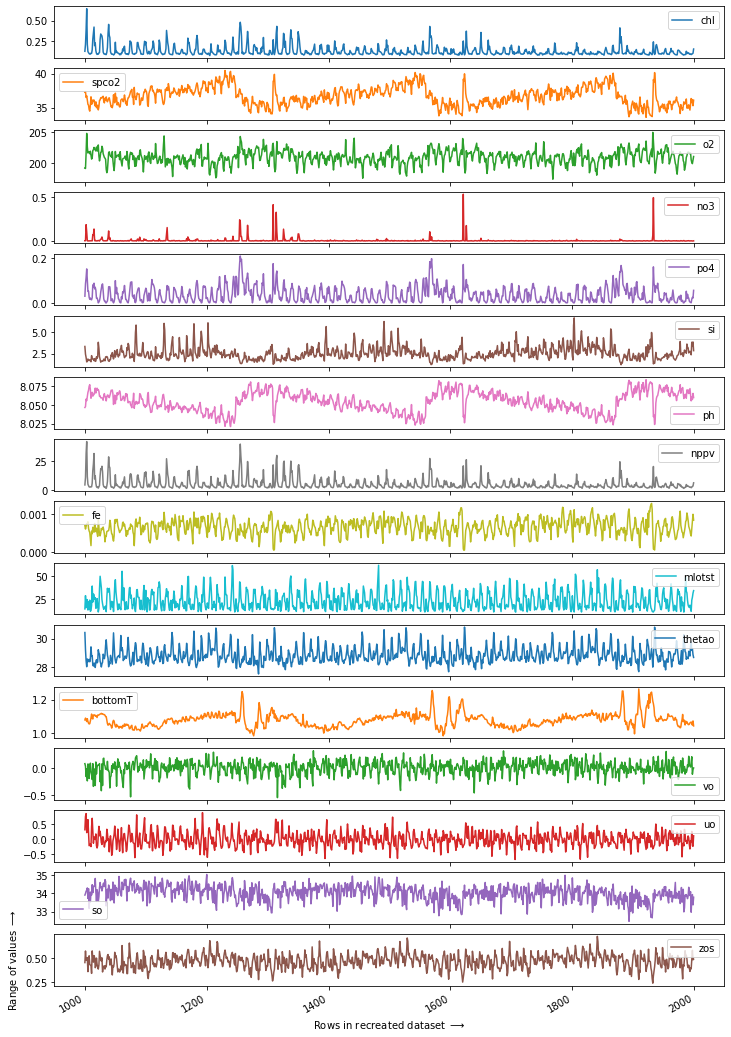

In [147]:
data[[
    'chl',
    'spco2',
    'o2',
    'no3',
    'po4',
    'si',
    'ph',
    'nppv',
    'fe',
    'mlotst',
    'thetao',
    'bottomT',
    'vo',
    'uo',
    'so',
    'zos'
]].iloc[1000:2000].plot(subplots=True, figsize=(12,20))
plt.xlabel('Rows in recreated dataset $\longrightarrow$')
plt.ylabel('Range of values $\longrightarrow$')